#  skip-gram모델 구현

In [1]:
from mynlp import preprocess,create_contexts_target,convert_one_hot
from nn_layers import MatMul, SoftmaxWithLoss, Adam, Trainer

import numpy as np

# import matplotlib.pyplot as plt
# plt.rc('font', family='Malgun Gothic')

In [2]:
class SimpleSkipGram:
    def __init__(self,vocab_size,hidden_size):   # 어휘수 : 7개, 은닉층의 뉴런 : 5
        V, H = vocab_size, hidden_size
        
        # 가중치 초기화
        W_in = 0.01*np.random.randn(V,H).astype('f')   # (7,5) 
        W_out = 0.01*np.random.randn(H,V).astype('f')  # (5,7)
        
        # 계층 생성
        self.in_layer = MatMul(W_in)        # (6,7)*(7,5) = (6,5)
        self.out_layer = MatMul(W_out)      # (6,5)*(5,7) = (6,7)
        
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다
        layers = [self.in_layer,self.out_layer]
        self.params, self.grads = [],[]
        for layer in layers: # 2회
            self.params += layer.params
            self.grads += layer.grads
       
        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vec = W_in           
        
    def predict(self,target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        return s
    
    def forward(self,contexts,target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        
        l1 = self.loss_layer1.forward(s,contexts[:,0,:])
        l2 = self.loss_layer2.forward(s,contexts[:,1,:])
        loss = l1 + l2
        return loss
    
    def backward(self,dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None  

### 학습 코드 구현

In [3]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)  # 7
contexts,target = create_contexts_target(corpus,window_size)

target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

print(contexts,contexts.shape)  # (6, 2, 7)
print(target,target.shape)  # (6,7)

[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]] (6, 2, 7)
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]] (6, 7)


In [4]:
model = SimpleSkipGram(vocab_size,hidden_size)
optimizer = Adam()
trainer = Trainer(model,optimizer)
trainer.fit(contexts,target,max_epoch,batch_size)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 26 |

| 에폭 257 |  반복 1 / 2 | 시간 0[s] | 손실 2.60
| 에폭 258 |  반복 1 / 2 | 시간 0[s] | 손실 2.74
| 에폭 259 |  반복 1 / 2 | 시간 0[s] | 손실 2.45
| 에폭 260 |  반복 1 / 2 | 시간 0[s] | 손실 2.58
| 에폭 261 |  반복 1 / 2 | 시간 0[s] | 손실 2.52
| 에폭 262 |  반복 1 / 2 | 시간 0[s] | 손실 2.50
| 에폭 263 |  반복 1 / 2 | 시간 0[s] | 손실 2.36
| 에폭 264 |  반복 1 / 2 | 시간 0[s] | 손실 2.85
| 에폭 265 |  반복 1 / 2 | 시간 0[s] | 손실 2.39
| 에폭 266 |  반복 1 / 2 | 시간 0[s] | 손실 2.65
| 에폭 267 |  반복 1 / 2 | 시간 0[s] | 손실 2.54
| 에폭 268 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 269 |  반복 1 / 2 | 시간 0[s] | 손실 2.43
| 에폭 270 |  반복 1 / 2 | 시간 0[s] | 손실 2.60
| 에폭 271 |  반복 1 / 2 | 시간 0[s] | 손실 2.57
| 에폭 272 |  반복 1 / 2 | 시간 0[s] | 손실 2.42
| 에폭 273 |  반복 1 / 2 | 시간 0[s] | 손실 2.60
| 에폭 274 |  반복 1 / 2 | 시간 0[s] | 손실 2.61
| 에폭 275 |  반복 1 / 2 | 시간 0[s] | 손실 2.52
| 에폭 276 |  반복 1 / 2 | 시간 0[s] | 손실 2.55
| 에폭 277 |  반복 1 / 2 | 시간 0[s] | 손실 2.60
| 에폭 278 |  반복 1 / 2 | 시간 0[s] | 손실 2.32
| 에폭 279 |  반복 1 / 2 | 시간 0[s] | 손실 2.55
| 에폭 280 |  반복 1 / 2 | 시간 0[s] | 손실 2.51
| 에폭 281 |  반복 1

| 에폭 477 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 478 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 479 |  반복 1 / 2 | 시간 0[s] | 손실 2.49
| 에폭 480 |  반복 1 / 2 | 시간 0[s] | 손실 2.20
| 에폭 481 |  반복 1 / 2 | 시간 0[s] | 손실 2.02
| 에폭 482 |  반복 1 / 2 | 시간 0[s] | 손실 2.52
| 에폭 483 |  반복 1 / 2 | 시간 0[s] | 손실 2.16
| 에폭 484 |  반복 1 / 2 | 시간 0[s] | 손실 2.37
| 에폭 485 |  반복 1 / 2 | 시간 0[s] | 손실 2.05
| 에폭 486 |  반복 1 / 2 | 시간 0[s] | 손실 2.37
| 에폭 487 |  반복 1 / 2 | 시간 0[s] | 손실 2.48
| 에폭 488 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 489 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 490 |  반복 1 / 2 | 시간 0[s] | 손실 2.41
| 에폭 491 |  반복 1 / 2 | 시간 0[s] | 손실 2.58
| 에폭 492 |  반복 1 / 2 | 시간 0[s] | 손실 2.00
| 에폭 493 |  반복 1 / 2 | 시간 0[s] | 손실 2.19
| 에폭 494 |  반복 1 / 2 | 시간 0[s] | 손실 2.36
| 에폭 495 |  반복 1 / 2 | 시간 0[s] | 손실 2.22
| 에폭 496 |  반복 1 / 2 | 시간 0[s] | 손실 2.29
| 에폭 497 |  반복 1 / 2 | 시간 0[s] | 손실 2.25
| 에폭 498 |  반복 1 / 2 | 시간 0[s] | 손실 2.03
| 에폭 499 |  반복 1 / 2 | 시간 0[s] | 손실 2.32
| 에폭 500 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 501 |  반복 1

| 에폭 751 |  반복 1 / 2 | 시간 1[s] | 손실 1.98
| 에폭 752 |  반복 1 / 2 | 시간 1[s] | 손실 2.25
| 에폭 753 |  반복 1 / 2 | 시간 1[s] | 손실 1.50
| 에폭 754 |  반복 1 / 2 | 시간 1[s] | 손실 2.44
| 에폭 755 |  반복 1 / 2 | 시간 1[s] | 손실 1.99
| 에폭 756 |  반복 1 / 2 | 시간 1[s] | 손실 1.80
| 에폭 757 |  반복 1 / 2 | 시간 1[s] | 손실 1.76
| 에폭 758 |  반복 1 / 2 | 시간 1[s] | 손실 2.21
| 에폭 759 |  반복 1 / 2 | 시간 1[s] | 손실 1.99
| 에폭 760 |  반복 1 / 2 | 시간 1[s] | 손실 1.80
| 에폭 761 |  반복 1 / 2 | 시간 1[s] | 손실 2.42
| 에폭 762 |  반복 1 / 2 | 시간 1[s] | 손실 1.76
| 에폭 763 |  반복 1 / 2 | 시간 1[s] | 손실 1.99
| 에폭 764 |  반복 1 / 2 | 시간 1[s] | 손실 2.01
| 에폭 765 |  반복 1 / 2 | 시간 1[s] | 손실 1.99
| 에폭 766 |  반복 1 / 2 | 시간 1[s] | 손실 1.98
| 에폭 767 |  반복 1 / 2 | 시간 1[s] | 손실 1.99
| 에폭 768 |  반복 1 / 2 | 시간 1[s] | 손실 2.20
| 에폭 769 |  반복 1 / 2 | 시간 1[s] | 손실 1.79
| 에폭 770 |  반복 1 / 2 | 시간 1[s] | 손실 1.75
| 에폭 771 |  반복 1 / 2 | 시간 1[s] | 손실 2.22
| 에폭 772 |  반복 1 / 2 | 시간 1[s] | 손실 1.97
| 에폭 773 |  반복 1 / 2 | 시간 1[s] | 손실 2.18
| 에폭 774 |  반복 1 / 2 | 시간 1[s] | 손실 1.98
| 에폭 775 |  반복 1

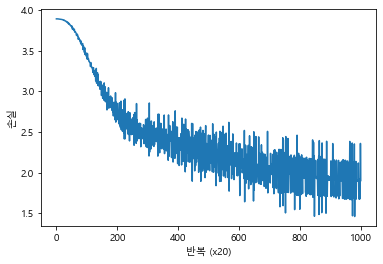

In [5]:
# 시각화
trainer.plot()

In [6]:
# W_in : 단어의 분산 표현
word_vecs = model.word_vec   
for word_id, word in id_to_word.items():
    print('%10s : '%word, word_vecs[word_id])

       you :  [ 0.00808753 -0.01195253 -0.02428061  0.00443144 -0.01048131]
       say :  [ 0.894927    0.77411443  0.43408585 -0.9909109  -0.44296837]
   goodbye :  [-0.6673491 -0.6894189  1.1057367  0.6816995  1.009333 ]
       and :  [ 0.9586236  1.0268286 -1.3673605 -0.9025154 -1.1593516]
         i :  [-0.6884635  -0.68631697  1.0992012   0.6612636   1.0075966 ]
     hello :  [-1.1161377  -1.12206    -0.6701145   1.1406183  -0.34405646]
         . :  [-0.00696114 -0.00420233 -0.00968657 -0.00385972  0.01128184]


## 예측 및 정확도 평가

In [7]:
h = model.predict(target[0,:])  # [0 1 0 0 0 0 0] ,'say'
print(h.shape)
print(h)
pred0 = np.argmax(h,0)
h[pred0] = 0
pred1 = np.argmax(h,0)
c0 = np.argmax(contexts[0,0,:])
c1 = np.argmax(contexts[0,1,:])
print('context : ',c0,c1)        # 0,2 : 'you' 와 'goodbye'
print('predict : ',pred0,pred1)  # 2,4 : 'goodbye' 와 'i'
print('-'*50)

h = model.predict(target[1,:])  # [0 0 1 0 0 0 0] ,'goodbye'
pred0 = np.argmax(h,0)
h[pred0] = 0
pred1 = np.argmax(h,0)
c0 = np.argmax(contexts[1,0,:])
c1 = np.argmax(contexts[1,1,:])
print('context : ',c0,c1)        # 1,3 : 'say' 와 'and'
print('predict : ',pred0,pred1)  # 1,3 : 'say' 와 'and'
print('-'*50)

(7,)
[ 1.74655755 -3.39156091  1.86206552 -1.41365329  1.87128981  1.74620715
 -2.3706466 ]
context :  0 2
predict :  4 2
--------------------------------------------------
context :  1 3
predict :  1 3
--------------------------------------------------


In [8]:
def get_correct(num):
    h = model.predict(target[num,:])  
    pred0 = np.argmax(h,0)
    h1 = h
    h[pred0] = 0
    pred1 = np.argmax(h1,0)
    c0 = np.argmax(contexts[num,0,:],0) 
    c1 = np.argmax(contexts[num,1,:],0) 
    print('context : ',c0,c1)
    print('predict : ',pred0,pred1)
    print('-'*50)
    correct = 0
    if (c0==pred0)|(c0==pred1):
        correct +=1
    if (c1==pred0)|(c1==pred1):
        correct +=1
    return correct    

print('[context:실제값', 'predict:예측값]')
acc = 0
for k in range(target.shape[0]) : # 6회
    correct = get_correct(k)
    acc += correct

accuracy = acc/target.shape[0]/2 # 12로 나눔  , 10/12 = 0.833

print('정확도 : ',np.round(accuracy,4)) # 정확도가 CBOW에 비해 비교적 높음

[context:실제값 predict:예측값]
context :  0 2
predict :  4 2
--------------------------------------------------
context :  1 3
predict :  1 3
--------------------------------------------------
context :  2 4
predict :  2 4
--------------------------------------------------
context :  3 1
predict :  1 3
--------------------------------------------------
context :  4 5
predict :  4 2
--------------------------------------------------
context :  1 6
predict :  1 6
--------------------------------------------------
정확도 :  0.8333


In [9]:
contexts[0,0,:]

array([1, 0, 0, 0, 0, 0, 0])

In [10]:
contexts[0,1,:]

array([0, 0, 1, 0, 0, 0, 0])

In [11]:
contexts[0,:,:]

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0]])

In [12]:
target[0,:]

array([0, 1, 0, 0, 0, 0, 0])